Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
!git clone https://github.com/40048403/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2512, done.
remote: Total 2512 (delta 0), reused 0 (delta 0), pack-reused 2512
Receiving objects: 100% (2512/2512), 8.20 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (1574/1574), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408194 sha256=d410936511f24b953b310298ee35418e8dc73e16e205415929a5f6cc14dce187
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh facades

Specified [facades]
for details.

--2023-11-30 20:49:34--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/facades.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35135868 (34M) [application/zip]
Saving to: ‘./datasets/facades.zip’

./datasets/facades. 100%[===================>]  33.51M   849KB/s    in 79s     

2023-11-30 20:50:54 (434 KB/s) - ‘./datasets/facades.zip’ saved [35135868/35135868]

Archive:  ./datasets/facades.zip
   creating: ./datasets/facades/trainA/
  inflating: ./datasets/facades/trainA/110_A.jpg  
  inflating: ./datasets/facades/trainA/324_A.jpg  
  inflating: ./datasets/facades/trainA/353_A.jpg  
  inflating: ./datasets/facades/trainA/319_A.jpg  
  inflating: ./datasets/facades/trainA/20_A.jpg  
  inflating: ./datasets/facades/trainA/274_A.jpg  
  inflating: ./d

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_cyclegan_model.sh facades_label2photo

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [facades_label2photo]
for details.

--2023-11-29 21:33:19--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>]  43.46M  59.6MB/s    in 0.7s    

2023-11-29 21:33:20 (59.6 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ s

# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
!python train.py --dataroot ./datasets/facades --name facades_label2photo --model cycle_gan --batch_size 4 --display_id -1

----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest             

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [ ]:
!python test.py --dataroot datasets/facades/ --name facades_label2photo_pretrained --model test --no_dropout --use_wandb

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/facades/             	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

In [ ]:
!bash ./scripts/eval_cityscapes/download_fcn8s.sh

for details.

--2023-11-29 21:34:30--  http://efrosgans.eecs.berkeley.edu/pix2pix_extra/fcn-8s-cityscapes.caffemodel
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 537897314 (513M)
Saving to: ‘./scripts/eval_cityscapes/caffemodel/fcn-8s-cityscapes.caffemodel’

./scripts/eval_city 100%[===================>] 512.98M  69.1MB/s    in 7.7s    

2023-11-29 21:34:38 (67.0 MB/s) - ‘./scripts/eval_cityscapes/caffemodel/fcn-8s-cityscapes.caffemodel’ saved [537897314/537897314]



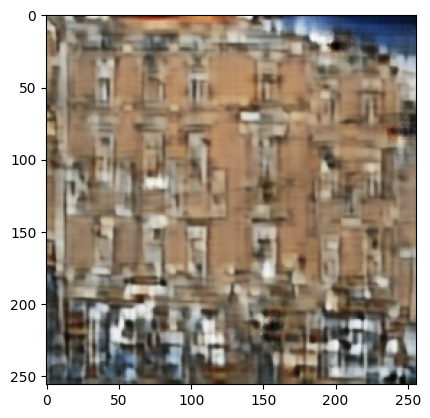

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_fake.png')
plt.imshow(img)

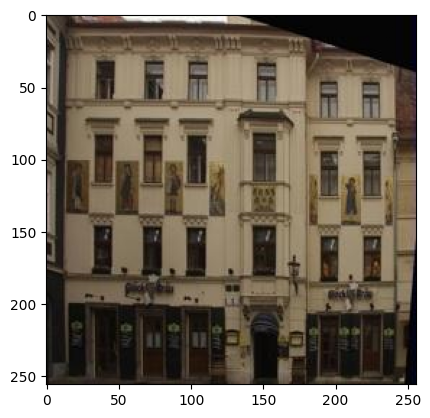

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real.png')
plt.imshow(img)